# House Price Prediction Analysis using Machine Learning

By Hamza Khan

# Key Steps
Exploratory Data Analysis (EDA)
- Visualized the relationships between key features and the target variable (price) to identify the most important factors influencing house prices.
- Checked for missing values, duplicates and data distribution to ensure data quality.
- Explored correlations between numerical features like living area, lot area, and house condition to understand their impact on pricing


Model Training and Evaluation

The dataset was split into training and testing sets using an 80/20 split ratio.
- Input Features (X): Columns except the target (Price) and other useless columns.
- Target Variable (Y): The Price column, which is the target we aim to predict.


Model Training
- A Linear Regression Model was trained using the X_train and Y_train data.
- The model fits the relationship between the house features and their prices.

Model Evaluation
- The model was evaluated on the test data using the R² score, achieving an accuracy of approximately 71%, indicates a well-performing model.


In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (11)\House Price India.csv")

In [98]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [100]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [102]:
df.shape

(14620, 23)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [106]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

In [108]:
df.tail()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [110]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


# Deleting the columns that we do not require

In [112]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [114]:
df.drop(columns = ['id', 'Date', 'Postal Code'], inplace = True)

In [116]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,52.6191,-114.472,2250,17286,3,76,221700
14616,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,52.5075,-114.393,1540,7480,3,59,219200
14617,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,52.7289,-114.507,1130,6120,2,64,209000
14618,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,52.7157,-114.411,1420,6631,3,54,205000


In [118]:
df.shape

(14620, 20)

# Checking for Null Values and Duplicate Values

In [120]:
df.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

There are no null values.

In [122]:
df.duplicated().sum()

0

There are no duplicates.

In [124]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51,805000


# Exploratory Data Analysis

Text(0.5, 0, 'Number of Views')

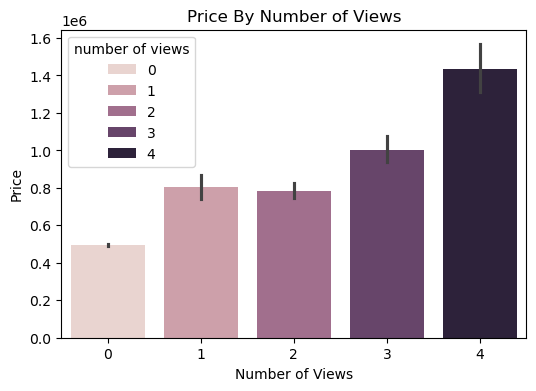

In [74]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['number of views'], y = df['Price'], hue = df['number of views'])
plt.title('Price By Number of Views')
plt.xlabel('Number of Views')

This Bar chart shows us that the price of the house increases with the number of views around them increasing. The more number of views around the house, the more expensive it gets.

Text(0.5, 0, 'Waterfront Present')

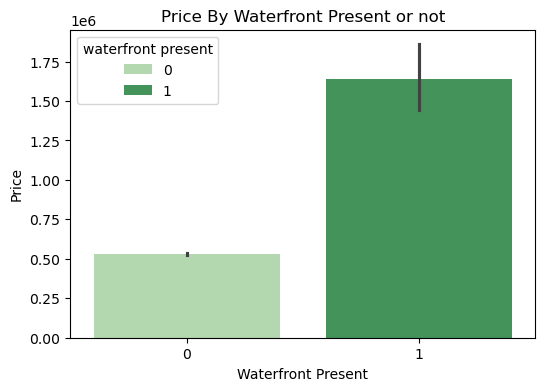

In [148]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['waterfront present'], y = df['Price'], hue = df['waterfront present'], palette = 'Greens')
plt.title('Price By Waterfront Present or not')
plt.xlabel('Waterfront Present')

This Barchart shows that the price of the houses with a waterfront infront of them is more than 3 times of the houses that dont have a waterfront present infront of them.

Text(45.73321180555554, 0.5, 'Area of the House')

<Figure size 600x400 with 0 Axes>

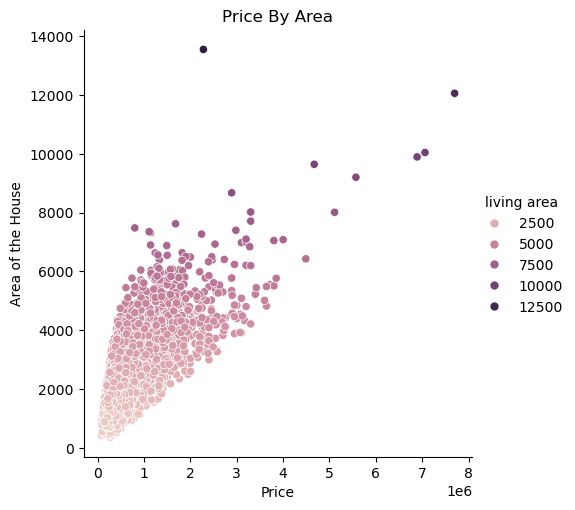

In [259]:
plt.figure(figsize = (6,4))
sns.relplot(x = df['Price'], y = df['living area'], hue = df['living area'])
plt.title('Price By Area')
plt.xlabel('Price')
plt.ylabel('Area of the House')

The above relationship plot shows us that the price of the house increases with the living area of the house.

Text(-3.9305555555555554, 0.5, 'Area of Basement')

<Figure size 600x400 with 0 Axes>

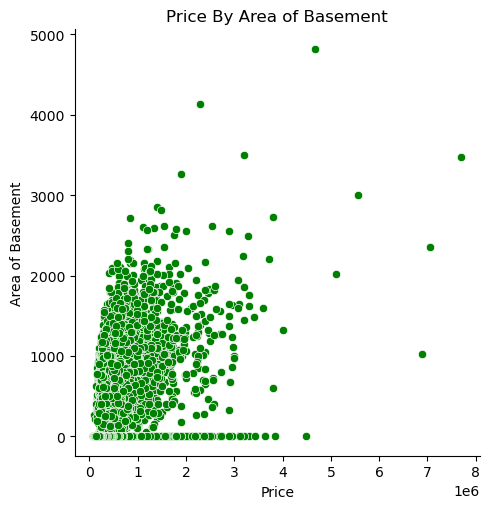

In [265]:
plt.figure(figsize = (6,4))
sns.relplot(x = df['Price'], y = df['Area of the basement'], color = 'Green')
plt.title('Price By Area of Basement')
plt.xlabel('Price')
plt.ylabel('Area of Basement')

The above relationship plot shows us that the price of the house increases with the Area of basement of the house.

Text(0, 0.5, 'Price')

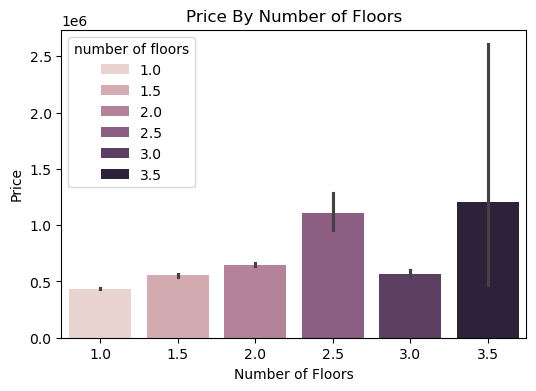

In [198]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['number of floors'], y = df['Price'], hue = df['number of floors'])
plt.title('Price By Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')

The Chart above shows that as the number of floors increase in a house, the prices increases as well. That works until the number of floors in the house is 2.5  and after that, it stops making a difference.

Text(0, 0.5, 'Price')

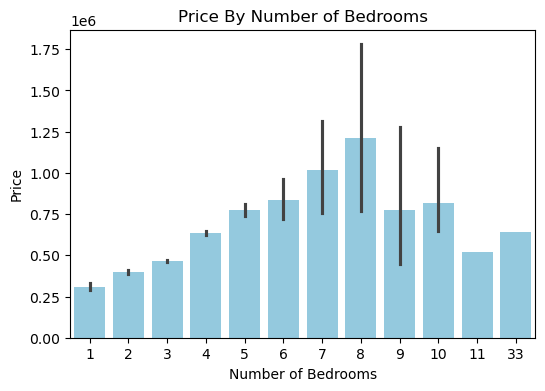

In [224]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['number of bedrooms'], y = df['Price'], color='skyblue')
plt.title('Price By Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

The Chart above shows that as the number of bedrooms increase in a house, the prices increases as well. That works until the number of bedrooms in the house are 8 and after that, it stops making a difference.

Text(74.59078395061728, 0.5, 'Area of the House (Excluding Basement)')

<Figure size 600x400 with 0 Axes>

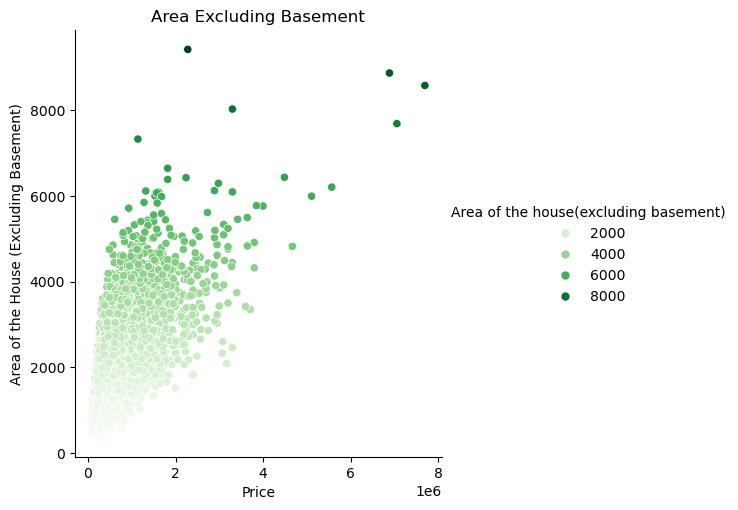

In [248]:
plt.figure(figsize = (6,4))
sns.relplot(x = df['Price'], y = df['Area of the house(excluding basement)'], hue = df['Area of the house(excluding basement)'], palette = 'Green')
plt.title('Area Excluding Basement')
plt.xlabel('Price')
plt.ylabel('Area of the House (Excluding Basement)')

The Above Relation Plot shows that the price of the house increases as the Area of the House Excluding Basement Increases.

Text(-3.9305555555555554, 0.5, 'Area of Basement')

<Figure size 600x400 with 0 Axes>

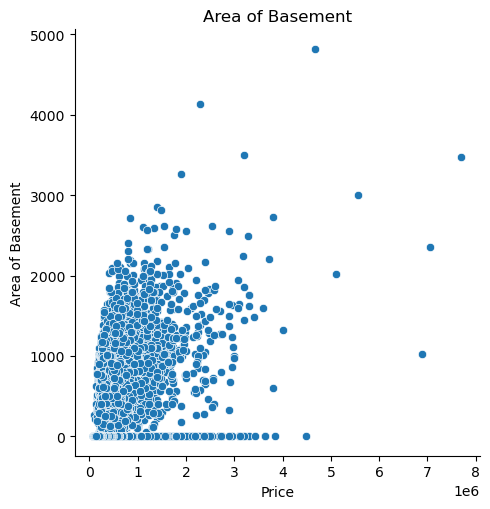

In [253]:
plt.figure(figsize = (6,4))
sns.relplot(x = df['Price'], y = df['Area of the basement'])
plt.title('Area of Basement')
plt.xlabel('Price')
plt.ylabel('Area of Basement')

The Above Relation Plot shows that the price of the house increases as the Area of the Basement Increases.

In [126]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51,805000


# Splitting Features and Target Data for Model Training and Testing

In [216]:
X = df.drop(columns = ['Price']) # Features (The Input Features that will be used to train our model)

Y = df['Price'] # Target (The Target that we will predict and used to to test our model)

# Splitting Data into Training and Testing Data for Prediction

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Model Training

In [202]:
model = LinearRegression()

In [204]:
train = model.fit(X_train, Y_train)

# Model Evaluation

In [208]:
test = model.predict(X_test)

In [210]:
model.score(X_test, Y_test)

0.7088987071055028

The accuracy of our House Price Prediction Machine Learning model turns out to be 71% which is a good trained model.